In [97]:
import cirq
import numpy as np

def cirq_counts(circuit: cirq.Circuit, shots=1024):
# Verified. See code_verification\cirq_counts.ipynb
    qubits = list(circuit.all_qubits())
    circuit = circuit.copy()
    circuit.append(cirq.measure(*qubits, key='m'))

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=shots)
    hist = result.histogram(key='m')

    counts = {format(k, f'0{len(qubits)}b'): v for k, v in hist.items()}
    return counts

def hellinger_fidelity(counts1, counts2):
    #print(f"counts1: {counts1}")
    #print(f"counts2: {counts2}")

    if not counts1 or not counts2:
        print("count = 0")
        return 0.0

    all_keys = set(counts1.keys()).union(counts2.keys())
    shots1 = sum(counts1.values())
    shots2 = sum(counts2.values())

    if shots1 == 0 or shots2 == 0:
        print("shot = 0")
        return 0.0

    p = np.array([np.sqrt(counts1.get(k, 0) / shots1) for k in all_keys])
    q = np.array([np.sqrt(counts2.get(k, 0) / shots2) for k in all_keys])

    #print(f"p (sqrt probs): {p}")
    #print(f"q (sqrt probs): {q}")

    fidelity = np.sum(p * q) ** 2
    #print(f"fidelity: {fidelity}")

    return fidelity


In [98]:
qubits = cirq.LineQubit.range(2)

circuit = cirq.Circuit(
    cirq.H(qubits[0]),
    cirq.CNOT(qubits[0], qubits[1])
)

count1 = cirq_counts(circuit, shots=1024)
count2 = cirq_counts(circuit, shots=5)

# Compute fidelity
fidelity = hellinger_fidelity(count1, count2)

0.5920201769760943


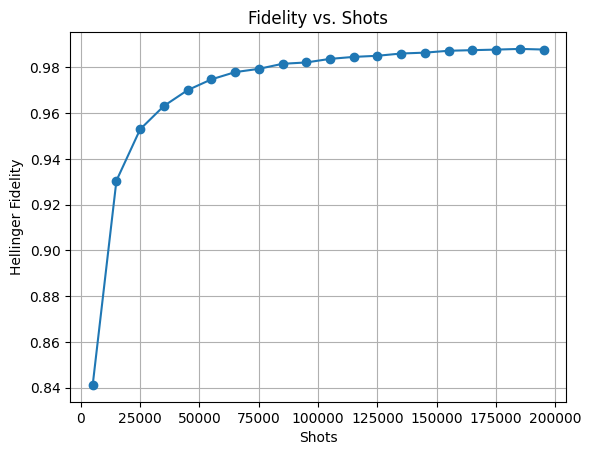

In [ ]:
qubits = cirq.LineQubit.range(12)

circuit = cirq.Circuit(
    cirq.H(qubits[0]),
    cirq.CNOT(qubits[0], qubits[1]),

    cirq.H(qubits[2]),
    cirq.CNOT(qubits[2], qubits[3]),

    cirq.H(qubits[4]),
    cirq.CNOT(qubits[4], qubits[5]),

    cirq.H(qubits[6]),
    cirq.CNOT(qubits[6], qubits[7]),

    cirq.H(qubits[8]),
    cirq.CNOT(qubits[8], qubits[9]),

    cirq.H(qubits[10]),
    cirq.CNOT(qubits[10], qubits[11]),

    cirq.rx(0.5).on(qubits[0]),
    cirq.ry(1.0).on(qubits[1]),
    cirq.rz(0.3).on(qubits[2]),
    cirq.rx(0.7).on(qubits[3]),
    cirq.ry(0.2).on(qubits[4]),
    cirq.rz(0.9).on(qubits[5]),
    cirq.rx(1.1).on(qubits[6]),
    cirq.ry(0.4).on(qubits[7]),
    cirq.rz(0.8).on(qubits[8]),
    cirq.rx(0.6).on(qubits[9]),
    cirq.ry(1.2).on(qubits[10]),
    cirq.rz(0.5).on(qubits[11]),

    cirq.CNOT(qubits[0], qubits[2]),
    cirq.CNOT(qubits[1], qubits[3]),
    cirq.CNOT(qubits[4], qubits[6]),
    cirq.CNOT(qubits[5], qubits[7]),
    cirq.CNOT(qubits[8], qubits[10]),
    cirq.CNOT(qubits[9], qubits[11]),

    cirq.H(qubits[0]),
    cirq.H(qubits[1]),
    cirq.H(qubits[2]),
    cirq.H(qubits[3]),
    cirq.H(qubits[4]),
    cirq.H(qubits[5]),
    cirq.H(qubits[6]),
    cirq.H(qubits[7]),
    cirq.H(qubits[8]),
    cirq.H(qubits[9]),
    cirq.H(qubits[10]),
    cirq.H(qubits[11]),

    cirq.CNOT(qubits[1], qubits[0]),
    cirq.CNOT(qubits[3], qubits[2]),
    cirq.CNOT(qubits[5], qubits[4]),
    cirq.CNOT(qubits[7], qubits[6]),
    cirq.CNOT(qubits[9], qubits[8]),
    cirq.CNOT(qubits[11], qubits[10]),

    cirq.rx(0.9).on(qubits[0]),
    cirq.ry(0.3).on(qubits[1]),
    cirq.rz(0.7).on(qubits[2]),
    cirq.rx(1.0).on(qubits[3]),
    cirq.ry(0.4).on(qubits[4]),
    cirq.rz(0.6).on(qubits[5]),
    cirq.rx(0.8).on(qubits[6]),
    cirq.ry(0.5).on(qubits[7]),
    cirq.rz(1.1).on(qubits[8]),
    cirq.rx(0.2).on(qubits[9]),
    cirq.ry(0.7).on(qubits[10]),
    cirq.rz(0.4).on(qubits[11]),

    # More entangling gates to push depth
    cirq.CNOT(qubits[0], qubits[3]),
    cirq.CNOT(qubits[1], qubits[4]),
    cirq.CNOT(qubits[2], qubits[5]),
    cirq.CNOT(qubits[6], qubits[9]),
    cirq.CNOT(qubits[7], qubits[10]),
    cirq.CNOT(qubits[8], qubits[11]),

    cirq.H(qubits[0]),
    cirq.H(qubits[1]),
    cirq.H(qubits[2]),
    cirq.H(qubits[3]),
    cirq.H(qubits[4]),
    cirq.H(qubits[5]),
    cirq.H(qubits[6]),
    cirq.H(qubits[7]),
    cirq.H(qubits[8]),
    cirq.H(qubits[9]),
    cirq.H(qubits[10]),
    cirq.H(qubits[11]),
)

baseline = cirq_counts(circuit, shots=204800)
other = cirq_counts(circuit, shots=1024)
print(hellinger_fidelity(baseline, other))


# Trade off between increasing shot and increased fidelity
# for a 12 qubit, 12 gate depth circuit
import matplotlib.pyplot as plt
shot_steps = range(5000, 204800, 10000)
fidelities = []

# Fixed baseline
baseline = cirq_counts(circuit, shots=204800)

for shots in shot_steps:
    other = cirq_counts(circuit, shots=shots)
    fidelity = hellinger_fidelity(baseline, other)
    fidelities.append(fidelity)

plt.plot(shot_steps, fidelities, marker='o')
plt.xlabel("Shots")
plt.ylabel("Hellinger Fidelity")
plt.title("Fidelity vs. Shots")
plt.grid(True)
plt.show()


^^^
For very large circuits like 12 qubit circuits, because there are 2^12=4096 measurement results, you need a high shot number.